# Data Science and the Academy Awards: Using Data Exploration and Analysis to Predict the Next Oscar Winner
Riley Shipley

__*Abstract* - The focus of this article is an exploration of trends among Oscar nominees and winners in an effort to determine if the Academy is predictable enough in its choice of nominees and award winners that a suitable model for predicting each can be constructed and deployed to a degree of accuracy that is greater than other notably accurate predictions made of past Academy Award ceremony years. Primarily this includes visualization of data from all Academy Awards ceremonies to date and the entire IMDb database to date in an effort to see what distinguishes Oscar nominees and winners from other movies, in order to determine which attributes will be used with selected prediction techniques. Finally, the most effective prediction techniques from a pre-selected range of available models will be evaluated for their efficacy in comparison to past prediction efforts.__

## I. Introduction
The Academy Award is a prestigious and sought after award designed to mark the best movies, actors, directors, crews, and effects that appear every year. The Academy claims it gives it awards based on merit alone, but there are many common sentiments that express otherwise. Biases toward certain genres, movie quality, and runtime have all been expressed as possible imbalances in the Academy's awarding system. I intend to investigate these claims by analyzing trends present regarding these attributes and their effects on Oscar nominations and award wins, and then take it a step further by attempting to predict Oscar winners and nominees based on the trends (or lack thereof) that I observed.

## II. Materials and Methods

### A. Data
The data sets used for this project include the *oscars*, *imdb*, and *imdb_ratings* repositories. The *oscars* data set was obtained via Kaggle \[1\] and serves as a record of every Academy Awards ceremony that has occurred since the first winners were awarded in 1927. Each record within the data set describes one Oscar nomination for a movie in one award category; a film may have multiple records in this data set associated with it if it was nominated for more than one award. Attributes of the *oscars* data set which are significant to the study include *year_film*, the year the film was released (typically the year before the ceremony takes place); *category*, the award category that the film was nominated for; *film*, the name of the nominated movie; and *winner*, a boolean indicating if the nomination won the award for the category it was nominated in.  
The other two data sets are provided directly by IMDb \[2\] and serve both to add more insightful attributes about Oscar nominees and winners than are present in the Oscars dataset, and to provide data on movies that were *not* nominated for Oscars but were eligible to be nominated, to see if there are differences in nominated and non-nominated films. Most of this additional data is provided through the *imdb* data set, which provides further data on the content of each film such as genre, media type and runtime. The *imdb_ratings* data set supplements this data with the average audience rating of each movie on a ten point scale as well as the number of votes that determined the rating received.
For simplicity going forward, attributes of each data set will be referenced using dot notation (i.e., *oscars*.*film* meaning the attribute *film* of the *oscars* dataset) and both data sets and attributes of data sets will continue being shown in italics as they have been thus far.  
For simplicity going forward, attributes of each table will be referenced using dot notation (i.e., *oscars*.*film* meaning the attribute *film* of the *oscars* dataset) and both datasets and attributes of datasets will continue being shown in italics as they have been thus far.

### B. Software & Modules
Python was chosen as the platform for this data science project due primarily to my familiarity with it over that of R or other languages, in addition to the flexibility and versatility of Python and third-party packages specifically in the field of data science that proved to be helpful throughout the course of the project.  
Four notable third-party modules used throughout the project include `pandas`, `matplotlib`, `numpy`, and `sklearn`. The `pandas` module \[3\] is used primarily for transforming the contents of each source data set into a useable data structure and for manipulating and deriving more data from existing data structures. `matplotlib` \[4\] is the plotting backend used by `pandas`, and is also used explicitly to create plots that are outside of the scope of `pandas`. `numpy` \[5\] is also a backend element of `pandas`, but it is explicitly used for operations and comparisons on `pandas DataFrame` and `Series` objects as well as simple lists. Finally, `sklearn` \[6\] is a large collection of supervised and unsupervised machine learning algorithms, data pre-processing functions, and model evaluation and optimization methods. You will notice that sklearn is not imported in Figure 1.1 like the other modules, and this is because I only needed a few of the many functions and models `sklearn` includes. Importing specific functions when they are needed is extremely helpful in limiting the memory profile of this notebook, which will already be quite large simply due to the nature of this study.
Multiple other modules are introduced and used throughout this article but their explanation is reserved for later on because they are only used for specific analyses and/or predictive models.

### C. Environment Preparation
A likely first step for many projects, as it is for this one, is proper environment preparation. In this case, the preparation is relatively simple - all one has to do to prepare for the analysis is introduce the third-party modules to the environment (Figure 1.1) and load each dataset into a corresponding DataFrame. The datasets mentioned above are each loaded into a separate DataFrame object in Figures 1.2 - 1.4 below using the `pandas read_csv` function followed by a preview of each DataFrame's contents.

In [1]:
''' Figure 1.1 - Including main 3rd party packages into the working environment '''
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
''' Figure 1.2 - oscars data set load & preview '''
oscars_original = pd.read_csv('oscars.csv')

# Save each data set as _original variant so there is an unadulterated copy available
# Working data set will just be named oscars, imdb, etc.
oscars_original

,year_film,year_ceremony,ceremony,category,name,film,winner
0,1927,1928,1,ACTOR,Richard Barthelmess,The Noose,False
1,1927,1928,1,ACTOR,Emil Jannings,The Last Command,True
2,1927,1928,1,ACTRESS,Louise Dresser,A Ship Comes In,False
3,1927,1928,1,ACTRESS,Janet Gaynor,7th Heaven,True
4,1927,1928,1,ACTRESS,Gloria Swanson,Sadie Thompson,False
...,...,...,...,...,...,...,...
10390,2019,2020,92,WRITING (Original Screenplay),"Screenplay by Bong Joon Ho, Han Jin Won; Story...",Parasite,True
10391,2019,2020,92,JEAN HERSHOLT HUMANITARIAN AWARD,Geena Davis,NaN,True
10392,2019,2020,92,HONORARY AWARD,David Lynch,NaN,True
10393,2019,2020,92,HONORARY AWARD,Wes Studi,NaN,True


In [3]:
''' Figure 1.3 - imdb data set load & preview '''
imdb_original = pd.read_csv('imdb_title_basics.tsv', sep='\t')
imdb_original

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"
...,...,...,...,...,...,...,...,...,...
7221672,tt9916848,tvEpisode,Episode #3.17,Episode #3.17,0,2010,\N,\N,"Action,Drama,Family"
7221673,tt9916850,tvEpisode,Episode #3.19,Episode #3.19,0,2010,\N,\N,"Action,Drama,Family"
7221674,tt9916852,tvEpisode,Episode #3.20,Episode #3.20,0,2010,\N,\N,"Action,Drama,Family"
7221675,tt9916856,short,The Wind,The Wind,0,2015,\N,27,Short


In [4]:
''' Figure 1.4 - imdb_rating data set load & preview '''
imdb_ratings_original = pd.read_csv('imdb_title_ratings.tsv',sep='\t')
imdb_ratings_original

,tconst,averageRating,numVotes
0,tt0000001,5.6,1648
1,tt0000002,6.1,198
2,tt0000003,6.5,1352
3,tt0000004,6.2,120
4,tt0000005,6.2,2139
...,...,...,...
1079287,tt9916580,7.2,5
1079288,tt9916690,6.6,5
1079289,tt9916720,6.0,61
1079290,tt9916766,6.9,14


### D. Data Preprocessing  
The first pass of preprocessing was purposefully limited to include only the most generic preprocessing steps with the intent that all analyses and models created should be able to begin with the same common data sets and perform further preprocessing on a copy of the common data based on the specifc needs of each method. 

#### 1. Removal of Academy Award non-candidates
Removal of media which are not eligible for Academy Awards is important because this study will make frequent comparisons between Oscar nominees and non-Oscar nominees in order to determine if there are factors which definitively set one group apart from the other. The consideration of ineligible media in these analyses could ultimately lead to an incorrect conclusion because the non-nominee group would be misrepresented, changing the relationships that predictor attributes have with the target attribute and each other, thus producing a misleading model or analysis.  
The rules for becoming an Oscar nominee are restrictive and detailed, but perhaps serendipitously, the only requirement that can be verified by the attributes present in the data is that nominees must be considered 'movies' or 'films' \[6\]. For our purposes, this means filtering the datasets from IMDb so that the only movies retained are those which have an *imdb*.*titleType* of 'movie' or 'short', as the rest of the media types in the database could not fit the Academy's definition of a film (Figure 2.1). It is likely that several of the items with the *titleType* of 'movie' or 'short' still do not fit the Academy definition of a movie, but there is no other information within the IMDb database that can be used to further determine whether an item can be a nominee candidate or not, so it is assumed that all items with the correct *titleType* are nominee candidates.

In [5]:
''' Figure 2.1 - Reduce IMDb basic dataset to only media of film-like types '''

# Copy original DataFrames into working DataFrames
imdb = imdb_original.copy()
oscars = oscars_original.copy()

imdb = imdb.loc[imdb.titleType.isin(['movie','short'])]

#### 2. Title Standardization
The *oscars* and *imdb* data sets do not have a reliable common key shared between them. As this is the case, we have to attempt to find a different way to merge the two data sets. It was assumed the title of each film should remain somewhat consistent between the databases, so the title fields in each database were standardized as much as possible to attempt to guarantee a shared key between databases.  
Each title column (*oscars*.*film*, *imdb*.*primaryTitle*, and *imdb*.*originalTitle*) was standardized in five steps (Figure 2.2):
1. Ensure all values within the columns are string types
2. Remove all films without titles from their respective databases
3. Remove punctuation and extraneous characters
4. Set each title in lower case
5. Remove extra spaces in each title  

The removal of records from the *imdb* working set was then translated to the *imdb_ratings* data set by making sure records in *imdb_ratings* had a *tconst* value that is found in *imdb*, meaning that it was able to pass through the filter applied to *imdb*.

In [9]:
''' Figure 2.2 - Standardization of IMDb and Oscars title attributes '''

''' Apply standardization to oscars.film column '''
# Cast to string
oscars['film'] = oscars.film.astype('str', copy=False)

# Remove missing titles
oscars = oscars.loc[oscars.film != 'nan']
oscars = oscars.loc[oscars.film != '']

# Set in lowercase
oscars.film = oscars.film.str.lower()

# Remove all characters that are not letters, numbers, or single spaces
oscars.film = oscars.film.str.replace('[^a-z0-9 ]',' ')

# Remove any extra spaces that showed up from the last step
oscars.film = oscars.film.str.replace('\s+',' ')

# Remove extra white space
oscars.film = oscars.film.str.strip()

''' Apply the same standardization to imdb.primaryTitle and imdb.originalTitle '''
imdb.primaryTitle = imdb.primaryTitle.astype('str')
imdb.originalTitle = imdb.originalTitle.astype('str')

# imdb uses '\\N' to denote missing values instead of 'nan'
imdb = imdb.loc[np.logical_and(imdb.primaryTitle != '\\N', imdb.originalTitle != '\\N')]
imdb = imdb.loc[np.logical_and(imdb.primaryTitle != '', imdb.originalTitle != '')]

imdb.primaryTitle = imdb.primaryTitle.str.lower()
imdb.originalTitle = imdb.originalTitle.str.lower()

imdb.primaryTitle = imdb.primaryTitle.str.replace('[^a-zA-Z0-9 ]',' ')
imdb.originalTitle = imdb.originalTitle.str.replace('[^a-zA-Z0-9 ]',' ')

imdb.primaryTitle = imdb.primaryTitle.str.replace('\s+',' ')
imdb.originalTitle = imdb.originalTitle.str.replace('\s+',' ')

imdb.primaryTitle = imdb.primaryTitle.str.strip()
imdb.originalTitle = imdb.originalTitle.str.strip()

In [10]:
''' Figure 2.3 - propagate filtering of imdb data set to all other IMDb data sets '''

# Make sure imdb_ratings entries have tconsts found in filtered imdb data set
imdb_ratings = imdb_ratings_original[imdb_ratings_original.tconst.isin(imdb.tconst)]

#### 3. Film Year Standardization
Another aspect of both the *oscars* and *imdb* data sets that required standardization was the year each film was produced. In order to do this, the records with missing years in each data set were intentionally marked as missing values, and each year column was cast to an integer to ensure that there would not be any incorrect type errors later on (Figure 2.4). It was decided that films with missing years should be marked as missing rather than removed because there are likely many analyses that can be done on other attributes of the data that do not require a film year. 0 was chosen as the missing value marker for its ease of use in both boolean and integer operations (i.e. no special conditions are needed for determining missing values).

In [11]:
''' Figure 2.4 - Standardize film release year '''

# Mark missing years and format year columns as integer columns
imdb.startYear = imdb.startYear.str.replace('\\N','0', regex=False)
imdb.startYear = imdb.startYear.astype('int64')

oscars.year_film = oscars.year_film.fillna(0)
oscars.year_film = oscars.year_film.astype('int64')

#### 4. Merging of *oscars* and *imdb* datasets
With the general preprocessing out of the way, the only remaining step to do before beginning exploratory analysis was to merge the *oscars* and *imdb* data sets so that more information about the Oscar winning movies is readily available. To do this, I implemented two separate merges of the two databases: one which exclusively matched on *oscar*.*film* to *imdb*.*primaryTitle*, and one which matched any unmatched movies remaining in the *imdb* data set on the *originalTitle* column. I then merged these two merges into a single DataFrame, which contains all of the Oscar movies found in *imdb* with columns from both data sets. (Figure 2.5)

In [12]:
''' Figure 2.5 - Merge oscars and imdb data sets into combined movies data set'''

# Get a DataFrame of all values that match IMDb on year and title
oscars_merge_primary = oscars.merge(imdb, how='inner', left_on=['film'], right_on=['primaryTitle'])
oscars_merge_original = oscars.merge(imdb.loc[imdb.primaryTitle != imdb.originalTitle],
                                     how='inner', left_on=['film'], right_on=['originalTitle'])
movies = pd.concat([oscars_merge_primary, oscars_merge_original], ignore_index=True, axis=0)
movies

,year_film,year_ceremony,ceremony,category,name,film,winner,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,1927,1928,1,ACTOR,Richard Barthelmess,the noose,False,tt0019217,movie,the noose,the noose,0,1928,\N,65,Drama
1,1927,1928,1,ACTOR,Richard Barthelmess,the noose,False,tt0052063,movie,the noose,petla,0,1958,\N,96,Drama
2,1927,1928,1,ACTOR,Richard Barthelmess,the noose,False,tt0263579,movie,the noose,o kloios,0,1987,\N,120,"Action,Thriller"
3,1927,1928,1,ACTOR,Richard Barthelmess,the noose,False,tt0858466,short,the noose,the noose,0,2006,\N,3,"Crime,Short"
4,1927,1928,1,ACTOR,Richard Barthelmess,the noose,False,tt3839132,short,the noose,thileia,0,2014,\N,12,"Documentary,Short"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50731,2015,2016,88,WRITING (Adapted Screenplay),Screenplay by Nick Hornby,brooklyn,False,tt1458730,movie,the gentle art of making friends,brooklyn,0,2010,\N,80,"Comedy,Crime"
50732,2015,2016,88,SHORT FILM (Live Action),Jamie Donoughue,shok,False,tt7153842,movie,shock,shok,0,1997,\N,\N,\N
50733,2017,2018,90,DOCUMENTARY (Feature),Bryan Fogel and Dan Cogan,icarus,True,tt7160762,movie,when icarus fell,icarus,0,2018,\N,121,Drama
50734,2017,2018,90,SHORT FILM (Animated),Dave Mullins and Dana Murray,lou,False,tt11630044,movie,the house,lou,0,2013,\N,85,Horror


Upon reviewing the result of the previous step, it became immediately obvious that more refinement was needed. The filtered *oscars* data set is only around ten thousand entries, so it appeared that the merge function had to have merged movies on a many-to-one or many-to-many basis in order to return the resulting set shown in the last figure. Upon closer inspection, I found that there were simply multiple movies in the IMDb database that share the same *primaryTitle* or *originalTitle* which also happens to match the title of an Oscar nominee. As a secondary filter, and an attempt to make the *movies* data set contain only a single record per Oscar award nomination, I filtered *movies* to only include films in which the *year_film* attribute from the *oscars* data set is within a year of the *startYear* attribute of the *imdb* data set (Figure 2.6).  
After completing that process, there were still a few hundred extra movies appearing in the data set that should not have been appearing, so as a final attempt to weed out movies which were unintentionally merged between databases, I ran a final filter over the *movies* dataset which removes any records which have conflicting *tconst* identifiers but correspond to the same *film* value (Figure 2.7). The movie removed is chosen so that movies that match original and primary title are kept first, dropping all other records which are associated with the same Oscar record. If there are still multiple records present after this filter, the movies are then screened to include only movies for which the *imdb* *startYear* and *oscars* *year_film* are equal. If multiple movies make it past that point, the IMDb record with the lowest *tconst* is chosen. This does not guarantee that the correct movie from the IMDb database is assigned to each Oscar record, as more information that is not found in these databases would be needed for that, but it does ensure that only one is assigned to each and I did observe that movies lower *tconst* values are typically the correct film. 

In [13]:
''' Figure 2.6 - Filter movies so that year_film and startYear are less than 2 years apart '''
movies = movies[abs(movies.year_film - movies.startYear) < 2]
movies

,year_film,year_ceremony,ceremony,category,name,film,winner,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,1927,1928,1,ACTOR,Richard Barthelmess,the noose,False,tt0019217,movie,the noose,the noose,0,1928,\N,65,Drama
7,1927,1928,1,ACTOR,Emil Jannings,the last command,True,tt0019071,movie,the last command,the last command,0,1928,\N,88,"Drama,History,Romance"
10,1927,1928,1,WRITING (Original Story),Lajos Biro,the last command,False,tt0019071,movie,the last command,the last command,0,1928,\N,88,"Drama,History,Romance"
13,1927,1928,1,ACTRESS,Louise Dresser,a ship comes in,False,tt0018389,movie,a ship comes in,a ship comes in,0,1928,\N,70,Drama
14,1927,1928,1,ACTRESS,Janet Gaynor,7th heaven,True,tt0018379,movie,7th heaven,7th heaven,0,1927,\N,110,"Drama,Romance"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50692,2008,2009,81,ART DIRECTION,Art Direction: James J. Murakami; Set Decorati...,changeling,False,tt0462225,short,dawnland,changeling,0,2009,\N,\N,"Drama,Short"
50693,2008,2009,81,CINEMATOGRAPHY,Tom Stern,changeling,False,tt0462225,short,dawnland,changeling,0,2009,\N,\N,"Drama,Short"
50694,2008,2009,81,DOCUMENTARY (Feature),Ellen Kuras and Thavisouk Phrasavath,the betrayal nerakhoon,False,tt1157685,movie,the betrayal,the betrayal nerakhoon,0,2008,\N,96,Documentary
50723,2012,2013,85,FOREIGN LANGUAGE FILM,Chile,no,False,tt2319932,short,no number,no,0,2012,\N,22,"Drama,Romance,Short"


In [14]:
''' Figure 2.7 - Removing conflicting records '''

# For each unique movie in the oscars database, marked by title and year
for oscar_title in movies.film.unique():
    for oscar_year in movies[movies.film == oscar_title].year_film.unique():
        # print(oscar_title, oscar_year)
        # Get all of the movies associated with this title and year
        movies_with_title_year = movies[np.logical_and(
                        movies['film']==oscar_title,
                        movies['year_film']==oscar_year)]
        
        if len(movies_with_title_year['tconst'].unique()) == 1:
            continue
            
        # We want to drop all extra movies so there is only one tconst per each title and year
        else:
            # Primary thing we want to check for is that primaryTitle and originalTitle match
            # Because if they aren't it is usually not the movie that was Oscar nominated
            
            matching_titles = movies_with_title_year[movies_with_title_year.primaryTitle==movies_with_title_year.originalTitle]
            
            # If only one movie has matching IMDb titles, keep it for this entry and drop all others
            if len(matching_titles.tconst.unique()) == 1:
                keep_tconst = matching_titles.tconst.unique()[0]
                # Drop every movie with this title and year except for the tconst with matching titles
                drop_list = np.logical_and(np.logical_and(movies.film == oscar_title, 
                                                        movies.year_film == oscar_year), 
                                                        movies.tconst != keep_tconst)
                movies = movies.drop(movies[drop_list].index, axis=0)
                continue
            
            # Otherwise we remove all films without matching titles and choose the film with closest startYear to the oscar record
            else:
                drop_list = np.logical_and(np.logical_and(movies.film == oscar_title, 
                                                        movies.year_film == oscar_year), 
                                                        movies.primaryTitle != movies.originalTitle)
                movies = movies.drop(movies[drop_list].index, axis=0)
                
                matching_year = movies_with_title_year[movies_with_title_year.startYear==movies_with_title_year.year_film]
                
                # If there is only one matching start year, keep it and move to the next record
                if len(matching_year.tconst.unique()) == 1:
                    drop_list = np.logical_and(np.logical_and(movies.film == oscar_title, 
                                                            movies.year_film == oscar_year), 
                                                            movies.startYear != movies.year_film)
                    movies = movies.drop(movies[drop_list].index, axis=0)
                    continue
                
                # Otherwise we remove all of the movies with non-matching startYears and just choose lowest tconst
                else:
                    drop_list = np.logical_and(np.logical_and(movies.film == oscar_title, 
                                                        movies.year_film == oscar_year), 
                                                        movies.startYear != movies.year_film)
                    movies = movies.drop(movies[drop_list].index, axis=0)
                    
                    # Get int versions of tconst IDs so they can be sorted numerically
                    tconst_ints = movies_with_title_year.tconst.apply(lambda x: int(x[2:]))
                    
                    # Get lowest tconst and reformat as a string
                    lowest_tconst = tconst_ints.sort_values(ignore_index=True).iloc[0]
                    lowest_tconst_str = "tt"+"%07d" %lowest_tconst
                    
                    drop_list = np.logical_and(np.logical_and(movies.film == oscar_title, 
                                                        movies.year_film == oscar_year), 
                                                        movies.tconst != lowest_tconst_str)
                    movies = movies.drop(movies[drop_list].index, axis=0)
                    
                    continue
movies

,year_film,year_ceremony,ceremony,category,name,film,winner,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,1927,1928,1,ACTOR,Richard Barthelmess,the noose,False,tt0019217,movie,the noose,the noose,0,1928,\N,65,Drama
7,1927,1928,1,ACTOR,Emil Jannings,the last command,True,tt0019071,movie,the last command,the last command,0,1928,\N,88,"Drama,History,Romance"
10,1927,1928,1,WRITING (Original Story),Lajos Biro,the last command,False,tt0019071,movie,the last command,the last command,0,1928,\N,88,"Drama,History,Romance"
13,1927,1928,1,ACTRESS,Louise Dresser,a ship comes in,False,tt0018389,movie,a ship comes in,a ship comes in,0,1928,\N,70,Drama
14,1927,1928,1,ACTRESS,Janet Gaynor,7th heaven,True,tt0018379,movie,7th heaven,7th heaven,0,1927,\N,110,"Drama,Romance"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50657,2002,2003,75,SHORT FILM (Live Action),"Dirk Beliën, Anja Daelemans",fait d hiver,False,tt0281850,short,gridlock,fait d hiver,0,2001,\N,7,"Comedy,Drama,Romance"
50659,2003,2004,76,DOCUMENTARY (Feature),Carlos Bosch and Josep Maria Domenech,balseros,False,tt0321376,movie,cuban rafters,balseros,0,2002,\N,120,Documentary
50674,2005,2006,78,FOREIGN LANGUAGE FILM,France,joyeux no l,False,tt0424205,movie,joyeux noel,joyeux no l,0,2005,\N,116,"Drama,History,Music"
50690,2007,2008,80,FOREIGN LANGUAGE FILM,Kazakhstan,mongol,False,tt0416044,movie,mongol the rise of genghis khan,mongol,0,2007,\N,126,"Action,Biography,Drama"


#### 5. Missing films
After the one-to-one merged data set had been created, I realized based on the number of rows in the data set that a few hundred movies in the Oscars database were not included in the merge. In Figure 2.8 below, the titles not included in the merge are displayed and saved to a file for further analysis to attempt to find patterns in the movies in order to include more of them in the original merge.

In [15]:
''' Figure 2.8 - Display and write to file all of the titles in the Oscars data set that did not get included '''
missing_titles = pd.DataFrame({'film':oscars[np.logical_not(oscars['film'].isin(movies['film']))]['film'].unique()})
missing_titles.sort_values(by=['film'], axis=0).to_csv('missing_titles.csv')

missing_titles

,film
0,chang
1,four devils
2,hollywood revue
3,anna christie
4,song of the flame
...,...
366,in the absence
367,star wars the rise of skywalker
368,breakthrough
369,dcera daughter


### E. Exploratory Analysis of Movie Characteristics

#### 1. Visualization of genre & Oscar status interaction
One of the hypotheses that I wished to test by way of this project is that the Academy has a bias towards nominating and awarding movies of certain genres much more than others. To begin this analysis, I simply plotted the distribution of Oscar nominations and wins by genre (Figures 3.1 & 3.2) and then created a normalized version of Figure 3.2 (Figure 3.3) so that the proportions of wins in each category became clear. To simplify the resulting graph and complexity of this analysis, I only included the first genre included in each movie's IMDb description in the analysis, saved as the *primaryGenre* attribute. I also did not accept the genres 'Short' and 'Animation' as primary genres for movies because there are Oscars specific to these kinds of movies and I did not want to bias the results towards these movies and/or awards because the focus is on a movie winning an Oscar in general, rather than a specific award.

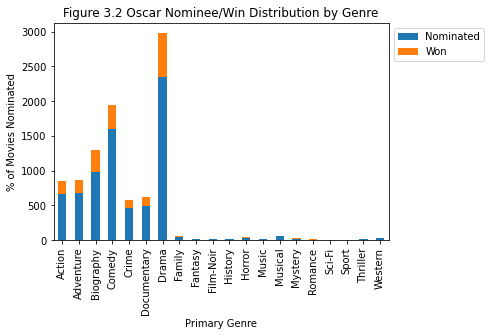

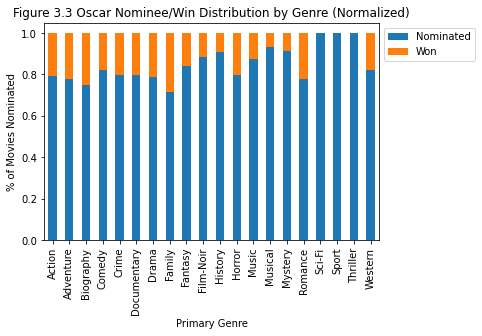

In [16]:
''' Figure 3.1 - Plot linear and normalized bar charts of nominations & wins vs genre'''

def primary_genre(genres):
    '''
    Return the first genre from genres that is not 'Short' or 'Animation', or None
    '''
    for genre in genres.split(','):
        if genre not in ('Short','Animation'):
            return genre
    return ''

# Create a primary genre based on the first genre in genres column
movies_genre = movies.copy()
movies_genre['primaryGenre'] = movies_genre['genres'].apply(primary_genre)

# Remove movies missing genres (for this analysis only)
movies_genre = movies_genre[movies_genre['primaryGenre'] != '\\N']
movies_genre = movies_genre[movies_genre['primaryGenre'] != '']
movies_genre['primaryGenre'] = movies_genre['primaryGenre'].astype('str')

# Create a crosstab to overlay awards status on top of genre and create a bar graph
genre_winners = pd.crosstab(movies_genre['winner'], movies_genre['primaryGenre'])
genre_winners.T.plot(kind='bar', stacked=True)
plt.ylabel('% of Movies Nominated')
plt.xlabel('Primary Genre')
plt.title('Figure 3.2 Oscar Nominee/Win Distribution by Genre')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), labels=['Nominated','Won'])
plt.show()

# Create a normalized bar graph to show the proportion of wins each genre receives
genre_winners_norm = genre_winners.div(genre_winners.sum(0))
genre_winners_norm.T.plot(kind='bar', stacked=True)
plt.ylabel('% of Movies Nominated')
plt.xlabel('Primary Genre')
plt.title('Figure 3.3 Oscar Nominee/Win Distribution by Genre (Normalized)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), labels=['Nominated','Won'])
plt.show()

Encouraged by what seems to be a significantly skewed distribution of Oscar nominations, I proceeded with the next visualization, with the goal of comparing distributions between Oscar nominees and all other movies to see if it is the distribution of Oscars that is skewed toward certain genres, or the distributions of films in the industry as a whole. Figure 3.4 creates a histogram (Figure 3.5) of genre distributions for each dataset are then normalized and overlaid on top of one another for easy comparison. Because many of the amounts were difficult to compare in a linear histogram, I then added Figure 3.6 which is the sanme visualization set on a logarithmic y-axis to make it easier to view genres with smaller frequencies in each dataset. 

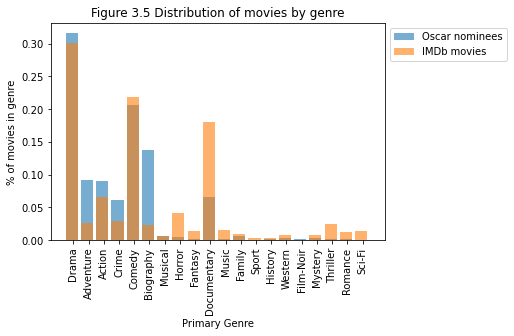

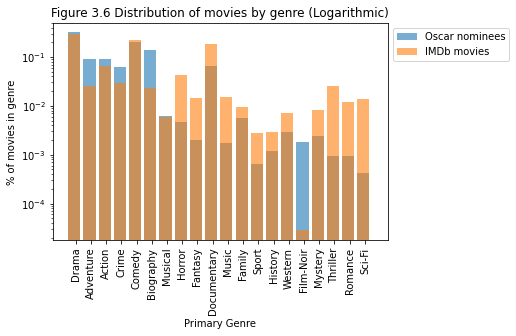

In [17]:
''' Figure 3.4 - Create semi-transparent overlaid histograms of Oscars and IMDb genre distributions '''

imdb_genre = imdb.copy()
# Create primaryGenre column in greater IMDb dataset
imdb_genre['primaryGenre'] = imdb_genre['genres'].apply(primary_genre)
imdb_genre = imdb_genre[imdb_genre['primaryGenre'] != '\\N']
imdb_genre = imdb_genre[imdb_genre['primaryGenre'] != '']
imdb_genre = imdb_genre[imdb_genre.primaryGenre.isin(movies_genre.primaryGenre)]
imdb_genre['primaryGenre'].astype('str', copy=False)

genres = movies_genre.primaryGenre.unique()

# Create an overlay of histograms showing genre distribution of nominees vs non-nominees
plt.hist(list(movies_genre['primaryGenre']), align='left', bins=np.arange(len(genres)+1), width = 0.8, alpha=0.6, density=True)


plt.hist(list(imdb_genre['primaryGenre']), align='left', bins=np.arange(len(genres)+1), width=0.8, alpha=0.6, density=True)

plt.xticks(rotation=90)
plt.xlabel('Primary Genre')
plt.ylabel('% of movies in genre')
plt.title('Figure 3.5 Distribution of movies by genre')
plt.legend(labels=['Oscar nominees','IMDb movies'], loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

# Create an overlay of histograms showing genre distribution of nominees vs non-nominees
plt.hist(list(movies_genre['primaryGenre']), align='left', bins=np.arange(len(genres)+1), width = 0.8, alpha=0.6, density=True, log=True)


plt.hist(list(imdb_genre['primaryGenre']), align='left', bins=np.arange(len(genres)+1), width=0.8, alpha=0.6, density=True, log=True)

plt.xticks(rotation=90)
plt.xlabel('Primary Genre')
plt.ylabel('% of movies in genre')
plt.title('Figure 3.6 Distribution of movies by genre (Logarithmic)')
plt.legend(labels=['Oscar nominees','IMDb movies'], loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

#### 2. Visualization of audience rating & Oscar status interaction
The next hypothesis I wanted to evaluate was the relationship between popularity and Oscar nominations and wins. It's commonly believed that most Oscar-winning films do not correlate with audience sentiment towards those movies, so the next visualizations I produced were linear and normalized versions (Figure 3.8 & 3.9) of a barchart showing distribution of Oscar nominees and wins against audience ratings on IMDb. As a precaution, I specified that the movies had to have at least 10 reviews so that there was at least a small number of votes to average out any outliers that may be present. 

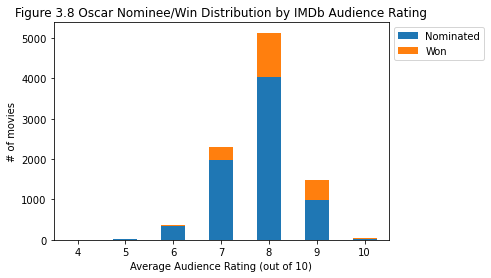

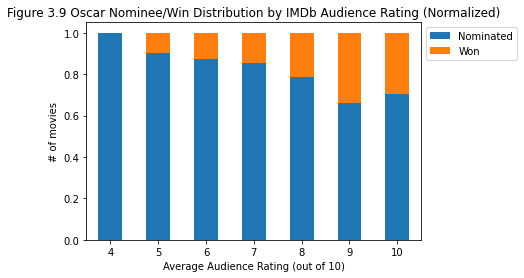

In [18]:
''' Figure 3.7 - Creating linear and normalized distribution bar charts of Oscar status vs audience rating '''
# Get the set of records from imdb_ratings that are Oscar nominees
oscar_ratings = imdb_ratings[imdb_ratings.tconst.isin(movies.tconst)]
oscar_ratings = oscar_ratings.merge(movies, on='tconst')

# Bin rating values from 1 to 10 
oscar_ratings = oscar_ratings[oscar_ratings.numVotes > 10]
oscar_ratings['ratings_binned'] = pd.cut(oscar_ratings['averageRating'], bins=range(11), labels=range(1,11), right=False)

rating_wins = pd.crosstab(oscar_ratings.winner, oscar_ratings.ratings_binned)
rating_wins.T.plot(kind='bar', stacked=True)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), labels=['Nominated','Won'])
plt.xlabel('Average Audience Rating (out of 10)')
plt.ylabel('# of movies')
plt.xticks(rotation=0)
plt.title('Figure 3.8 Oscar Nominee/Win Distribution by IMDb Audience Rating')
plt.show()

rating_wins_norm = rating_wins.div(rating_wins.sum(0))
rating_wins_norm.T.plot(kind='bar', stacked=True)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), labels=['Nominated','Won'])
plt.xlabel('Average Audience Rating (out of 10)')
plt.ylabel('# of movies')
plt.xticks(rotation=0)
plt.title('Figure 3.9 Oscar Nominee/Win Distribution by IMDb Audience Rating (Normalized)')
plt.show()

As before, I followed this up with a visualization comparing the Oscars distribution to the rating distribution of all movies in IMDb to see if any large differences between the two distributions are present.

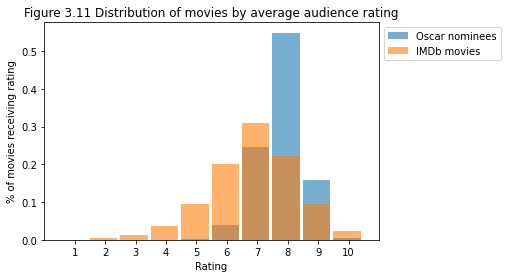

In [19]:
''' Figure 3.10 - Oscars/IMDb rating distribution comparison'''
plt.hist(oscar_ratings.averageRating, width=0.9, alpha=0.6, density=True, bins=range(11))
plt.hist(imdb_ratings.averageRating, width=0.9, alpha=0.6, density=True, bins=range(11))
plt.xticks(ticks=np.arange(1,11)-0.5, labels=range(1, 11))
plt.ylabel('% of movies receiving rating')
plt.xlabel('Rating')
plt.title('Figure 3.11 Distribution of movies by average audience rating')
plt.legend(labels=['Oscar nominees','IMDb movies'], loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

#### 3. Visualization of runtime & Oscar interactions
A final hypothesis I wished to explore is the idea that Oscars tend to favor movies within a certain range of runtimes more than others. In Figure 3.13 a chart similar to the first figures in the previous subsections is created, resulting in Figures 3.14 & 3.15, which are linear and normalized distributions of Oscar wins and nominations. After noticing the significant spike in the number of nominations between 80 and 180 minutes, I decided to take a closer look at the same distribution chart exclusively in that range of runtimes, using a smaller grouping of runtimes per mark to get a closer look at the patterns present within them, resulting in Figures 3.16 - 3.18.

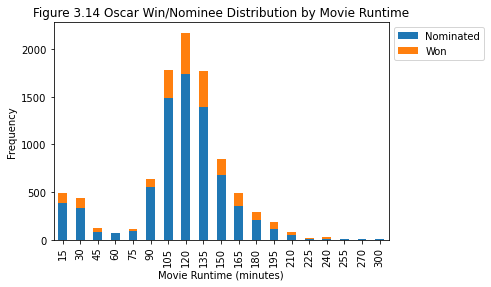

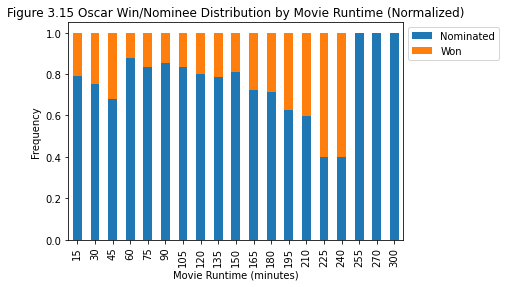

In [20]:
''' Figure 3.13 - Create linear and normalized Oscar nominee/win distribution charts for runtimes '''
oscars_runtimes = movies[movies.runtimeMinutes != '\\N']['runtimeMinutes']
oscars_runtimes = oscars_runtimes.astype('int64')
oscar_runtimes_binned = pd.cut(oscars_runtimes, bins=range(0,301,15), labels = ['%d'%(i) for i in range(15, 301, 15)])
runtime_wins = pd.crosstab(movies.winner, oscar_runtimes_binned)

runtime_wins.T.plot(kind='bar', stacked=True)
plt.legend(labels=['Nominated', 'Won'], loc='upper left', bbox_to_anchor=(1, 1))
plt.xlabel('Movie Runtime (minutes)')
plt.ylabel('Frequency')
plt.title('Figure 3.14 Oscar Win/Nominee Distribution by Movie Runtime')
plt.show()

runtime_wins_norm = runtime_wins.div(runtime_wins.sum(0))
runtime_wins_norm.T.plot(kind='bar', stacked=True)
plt.legend(labels=['Nominated', 'Won'], loc='upper left', bbox_to_anchor=(1, 1))
plt.xlabel('Movie Runtime (minutes)')
plt.ylabel('Frequency')
plt.title('Figure 3.15 Oscar Win/Nominee Distribution by Movie Runtime (Normalized)')
plt.show()

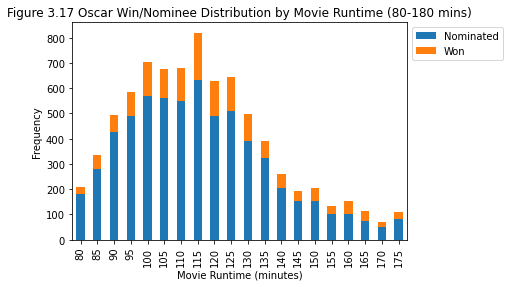

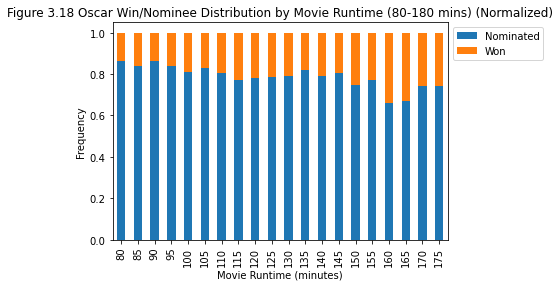

In [21]:
''' Figure 3.16 - Closer look at runtime distribution for movies running 80 - 180 minutes '''
oscars_runtimes = oscars_runtimes[np.logical_and(oscars_runtimes >= 80,oscars_runtimes <= 180)]

oscar_runtimes_binned = pd.cut(oscars_runtimes, bins=range(80,186,5), labels=range(80,181,5))
runtime_wins = pd.crosstab(movies.winner, oscar_runtimes_binned)

runtime_wins.T.plot(kind='bar', stacked=True)
plt.legend(labels=['Nominated', 'Won'], loc='upper left', bbox_to_anchor=(1, 1))
plt.xlabel('Movie Runtime (minutes)')
plt.ylabel('Frequency')
plt.title('Figure 3.17 Oscar Win/Nominee Distribution by Movie Runtime (80-180 mins)')
plt.show()

runtime_wins_norm = runtime_wins.div(runtime_wins.sum(0))
runtime_wins_norm.T.plot(kind='bar', stacked=True)
plt.legend(labels=['Nominated', 'Won'], loc='upper left', bbox_to_anchor=(1, 1))
plt.xlabel('Movie Runtime (minutes)')
plt.ylabel('Frequency')
plt.title('Figure 3.18 Oscar Win/Nominee Distribution by Movie Runtime (80-180 mins) (Normalized)')
plt.show()

I also visualized the distribution of Oscar nominee runtimes against those of ordinary movie runtimes in effort to determine if the Academy is biased in its choice of nominees on the basis of runtime. I created both linear and logarithmic histograms because the distribution of runtimes is so highly imbalanced. 

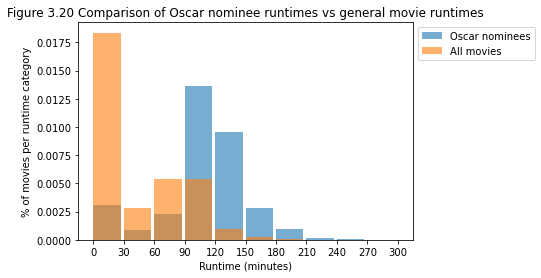

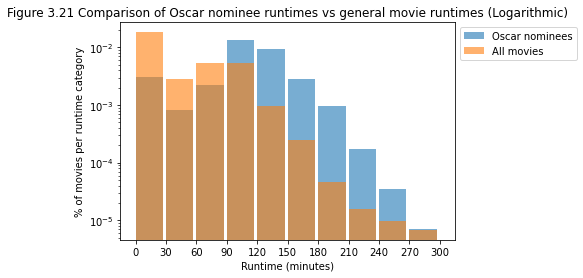

In [22]:
''' Figure 3.19 - Creation of runtime distribution comparison histogram'''
oscar_runtimes = movies[movies.runtimeMinutes != '\\N']['runtimeMinutes'].astype('int64')
imdb_runtimes = imdb[imdb.runtimeMinutes != '\\N']['runtimeMinutes'].astype('int64')


plt.hist(oscar_runtimes, bins=range(0, 301, 30), width=27, alpha=0.6, density=True)
plt.hist(imdb_runtimes,  bins=range(0, 301, 30), width=27, alpha=0.6, density=True)
plt.ylabel('% of movies per runtime category')
plt.xlabel('Runtime (minutes)')
plt.xticks(range(0, 301, 30))
plt.title('Figure 3.20 Comparison of Oscar nominee runtimes vs general movie runtimes')
plt.legend(labels=['Oscar nominees','All movies'], loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

plt.hist(oscar_runtimes, bins=range(0, 301, 30), width=27, alpha=0.6, density=True, log=True)
plt.hist(imdb_runtimes,  bins=range(0, 301, 30), width=27, alpha=0.6, density=True, log=True)
plt.ylabel('% of movies per runtime category')
plt.xlabel('Runtime (minutes)')
plt.xticks(range(0, 301, 30))
plt.title('Figure 3.21 Comparison of Oscar nominee runtimes vs general movie runtimes (Logarithmic)')
plt.legend(labels=['Oscar nominees','All movies'], loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

### F. Visualizing Relationships Between Movie Characteristics
The first thing I did when considering what kind of model to use in order to make Oscar predictions is realize a need to see the data in a more comprehensive way that might more clearly allow me to see an intuitive choice for machine learning model, rather than somewhat blindly guessing as to what models might be best suited for this purpose based on the single attribute visualizations alone. 
#### 1. Rating vs Genre
For each of these visualizations, the goal is to display one of the attributes on the y-axis, one on the x-axis, and to plot the points accordingly, highlighting either movies that win their Oscar nominations (when only looking at nominations), or nominated movies (when looking at the entire IMDb dataset) through the use of color.
In Figure 4.1, visualizations are created for interactions between average IMDb audience rating and primary genre at both of these levels. A hexbin visualization was chosen because the nature of the data is two-dimensional, but one of the attributes shown (genre) is categorical, meaning that a scatterplot or similar plot would have been difficult to interpret because all of the points would only align to certain points on the genre axis.
To create the hexbin, the respective data sets are merged with the original *imdb_ratings* data set to obtain rating information, and are then filtered to exclude movies that have less than 10 votes on audience rating. Following this, the categorical names of the primary genres in each data set are each assigned an integer in order to assign each genre an x-coordinate in the hexbin. From there the hexbins are created with the x-axis corresponding to genre, y-axis corresponding to rating, and darkness of each hexagon representing the number of wins/nominees that have the values specified by the hexagon's location.
For the nominee hexbin specifically, a logarithmic binning strategy was applied rather than a linear binning because the linear binning was not producing visually distinct results. The minimum count for the nominee hexbin was applied because the lack of a minimum count produced a visually cluttered hexbin that further made the distinction between more and less saturated hexagons harder to make.

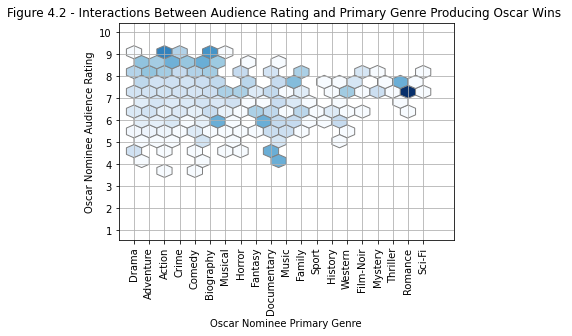

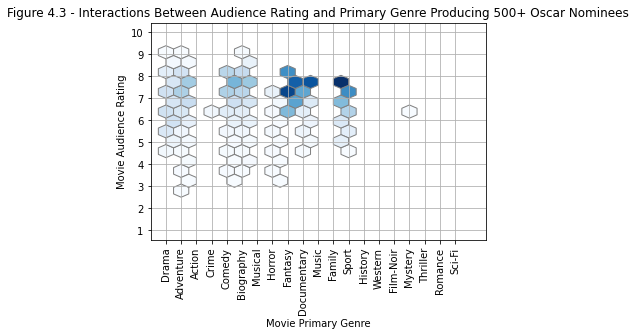

In [23]:
''' Figure 4.1 - Creation of Rating vs Genre Hexbins for Nominee/Win and Nominee/Non-Nominee Comparisons'''
movies_genre_rating = movies_genre.merge(imdb_ratings_original, how='left', on='tconst')
movies_genre_rating = movies_genre_rating.fillna(0)
movies_genre_rating = movies_genre_rating[movies_genre_rating.numVotes >= 10]

genre_to_int = {}
for i, genre in enumerate(movies_genre_rating.primaryGenre.unique()):
    genre_to_int[genre] = i

plt.hexbin(x=movies_genre_rating.primaryGenre.apply(lambda x: genre_to_int[x]), 
           y=movies_genre_rating.averageRating, gridsize=(len(movies_genre_rating.primaryGenre.unique()),10),
           C=movies_genre_rating.winner.astype('int32'), extent=(0,len(movies_genre_rating.primaryGenre.unique()),1,10),
           cmap="Blues", edgecolors="gray")
plt.xticks(range(len(movies_genre_rating.primaryGenre.unique())),movies_genre_rating.primaryGenre.unique(), rotation=90)
plt.xlabel("Oscar Nominee Primary Genre")
plt.ylabel("Oscar Nominee Audience Rating")
plt.title("Figure 4.2 - Interactions Between Audience Rating and Primary Genre Producing Oscar Wins ")
plt.yticks(range(1,11))
plt.grid(True)
plt.show()

imdb_genre_rating = imdb_genre.merge(imdb_ratings_original, how='left', on='tconst')
imdb_genre_rating = imdb_genre_rating.fillna(0)
imdb_genre_rating["nominated"] = imdb_genre_rating.tconst.isin(movies.tconst).astype('int32')
imdb_genre_rating = imdb_genre_rating[imdb_genre_rating.numVotes >= 10]
imdb_genre_rating = imdb_genre_rating[imdb_genre_rating.primaryGenre != "Short"]

genre_to_int = {}
int_to_genre = {}
for i, genre in enumerate(imdb_genre_rating.primaryGenre.unique()):
    if genre not in genre_to_int.keys():
        genre_to_int[genre] = i

plt.hexbin(x=imdb_genre_rating.primaryGenre.apply(lambda x: genre_to_int[x]), 
           y=imdb_genre_rating.averageRating, gridsize=(len(movies_genre_rating.primaryGenre.unique()),10),
           C=imdb_genre_rating.nominated, extent=(0,len(movies_genre_rating.primaryGenre.unique()),1,10),
           cmap="Blues", edgecolors="gray", bins="log", mincnt=500)
plt.xticks(range(len(movies_genre_rating.primaryGenre.unique())),movies_genre_rating.primaryGenre.unique(), rotation=90)
plt.xlabel("Movie Primary Genre")
plt.ylabel("Movie Audience Rating")
plt.title("Figure 4.3 - Interactions Between Audience Rating and Primary Genre Producing 500+ Oscar Nominees")
plt.yticks(range(1,11))
plt.grid(True)
plt.show()

#### 2. Runtime vs Genre
Once again, the aim is to create two hexbins, this time showing interactions of movie runtime and primary genre that produce Oscar winners from the pool of nominees, and Oscar nominees from the pool of movies at large. Figure 4.4 contains code very similar to that of 4.1, tweaked slightly to tailor it to runtime rather than audience rating.

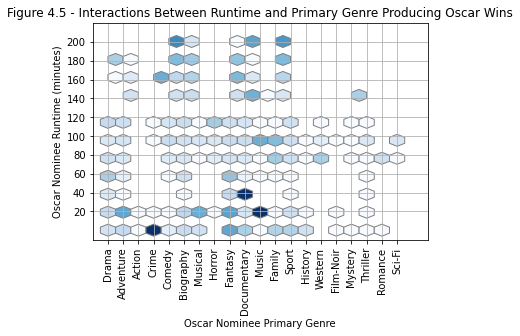

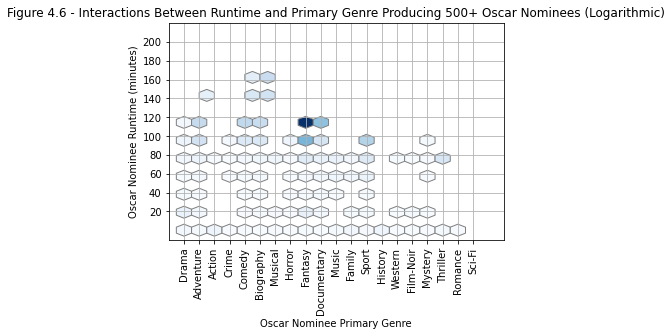

In [24]:
''' Figure 4.4 - Creation of Runtime vs Genre Hexbins for Nominee/Win and Nominee/Non-Nominee Comparisons'''
movies_genre_runtime = movies_genre[movies_genre.runtimeMinutes != "\\N"]
movies_genre_runtime = movies_genre_runtime[movies_genre_runtime.runtimeMinutes != "0"]

movies_genre_runtime["runtime_bins"] = pd.cut(movies_genre_runtime.runtimeMinutes.astype('int32'), bins=range(0,225,20), labels=range(0,220,20))
plt.hexbin(x=movies_genre_runtime.primaryGenre.apply(lambda x: genre_to_int[x]),
           y=movies_genre_runtime.runtime_bins, 
           gridsize = 20,
           #gridsize=(len(movies_genre_runtime.primaryGenre.unique()),len(movies_genre_runtime.runtime_bins)),
           C=movies_genre_runtime.winner.astype('int32'), extent=(0,len(movies_genre_runtime.primaryGenre.unique()),0,210),
           cmap="Blues", edgecolors="gray")

plt.xticks(range(len(movies_genre_runtime.primaryGenre.unique())),movies_genre_runtime.primaryGenre.unique(), rotation=90)
plt.xlabel("Oscar Nominee Primary Genre")
plt.ylabel("Oscar Nominee Runtime (minutes)")
plt.title("Figure 4.5 - Interactions Between Runtime and Primary Genre Producing Oscar Wins")
plt.yticks(range(20,220,20))
plt.grid(True)
plt.show()

imdb_genre_runtime = imdb_genre[imdb_genre.runtimeMinutes != "\\N"]
imdb_genre_runtime = imdb_genre_runtime[imdb_genre_runtime.runtimeMinutes != "0"]
imdb_genre_runtime["nominated"] = imdb_genre_runtime.tconst.isin(movies.tconst)

imdb_genre_runtime["runtime_bins"] = pd.cut(imdb_genre_runtime.runtimeMinutes.astype('int32'), bins=range(0,225,20), labels=range(0,220,20))
plt.hexbin(x=imdb_genre_runtime.primaryGenre.apply(lambda x: genre_to_int[x]),
           y=imdb_genre_runtime.runtime_bins, 
           gridsize = 20,
           C=imdb_genre_runtime.nominated.astype('int32'), extent=(0,len(movies_genre_rating.primaryGenre.unique()),0,210),
           cmap="Blues", edgecolors="gray",
           mincnt = 500, bins='log')

plt.xticks(range(len(movies_genre_rating.primaryGenre.unique())),movies_genre_rating.primaryGenre.unique(), rotation=90)
plt.xlabel("Oscar Nominee Primary Genre")
plt.ylabel("Oscar Nominee Runtime (minutes)")
plt.title("Figure 4.6 - Interactions Between Runtime and Primary Genre Producing 500+ Oscar Nominees (Logarithmic)")
plt.yticks(range(20,220,20))
plt.grid(True)
plt.show()

#### 3. Runtime vs Rating
For the final set of interactions, runtime and rating, I had planned to create scatterplots to visualize the amount of interactions between the two attributes that produce both Oscar wins and nominations, but after prototyping that visualization, I quickly realized that there are simply too many points in both categories to view and comprehend effectively, so I once again turned to a hexbin to reduce the amount of visual clutter in the visualization, which gave me a much clearer idea of the relationship these two variables have with winner and nominee status.

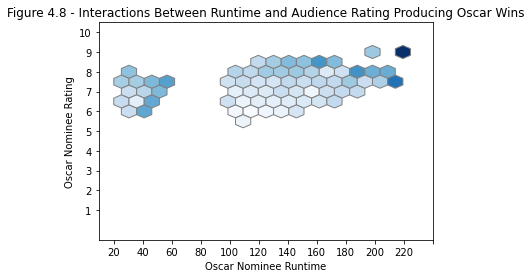

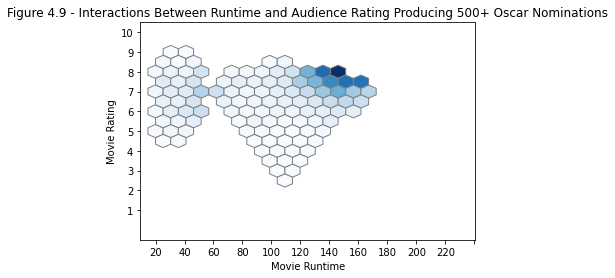

In [25]:
''' Figure 4.7 - Creation of Runtime vs Rating Scatterplots for Nominee/Win and Nominee/Non-Nominee Comparisons'''
movies_rating_runtime = movies.merge(imdb_ratings_original, on = "tconst")

movies_rating_runtime = movies_rating_runtime.fillna(0)
movies_rating_runtime = movies_rating_runtime[movies_rating_runtime.numVotes >= 10]

movies_rating_runtime = movies_rating_runtime[movies_rating_runtime.runtimeMinutes != "\\N"]
movies_rating_runtime = movies_rating_runtime[movies_rating_runtime.runtimeMinutes != "0"]

plt.hexbin(movies_rating_runtime.runtimeMinutes, movies_rating_runtime.averageRating, C=movies_rating_runtime.winner,
          mincnt = 25, gridsize=(20,10), extent=(0,210,0,10), cmap="Blues", edgecolors="gray")
plt.xticks(range(0,240, 20),range(20,240, 20))
plt.yticks(range(1,11))
plt.ylabel("Oscar Nominee Rating")
plt.xlabel("Oscar Nominee Runtime")
plt.title("Figure 4.8 - Interactions Between Runtime and Audience Rating Producing Oscar Wins")
plt.show()
plt.show()

imdb_rating_runtime = imdb.merge(imdb_ratings_original, on = "tconst")

imdb_rating_runtime = imdb_rating_runtime.fillna(0)
imdb_rating_runtime = imdb_rating_runtime[imdb_rating_runtime.numVotes >= 10]

imdb_rating_runtime = imdb_rating_runtime[imdb_rating_runtime.runtimeMinutes != "\\N"]
imdb_rating_runtime = imdb_rating_runtime[imdb_rating_runtime.runtimeMinutes != "0"]

imdb_rating_runtime["nominated"] = imdb_rating_runtime.tconst.isin(movies.tconst)

plt.hexbin(imdb_rating_runtime.runtimeMinutes, imdb_rating_runtime.averageRating, C=imdb_rating_runtime.nominated,
          mincnt = 500, gridsize=(20,10), extent=(0,210,0,10), cmap="Blues", edgecolors="gray", bins='log')
plt.xticks(range(0,240, 20),range(20,240, 20))
plt.yticks(range(1,11))
plt.ylabel("Movie Rating")
plt.xlabel("Movie Runtime")
plt.title("Figure 4.9 - Interactions Between Runtime and Audience Rating Producing 500+ Oscar Nominations")
plt.show()

### G. Predictive Classification Methods
#### 1. Partitioning
For all of the predictive methods used, all of the data available in the (preprocessed) *oscars* and *imdb* datasets were divided into two partitions. This was done at an approximate 3:1 ratio of training to testing data, and was accomplished by randomly choosing a subset of all of the years that an Academy Awards ceremony was held, and then selecting partitions of the relevant datasets using those years as row filters. The built-in `random` module was used for the random year selection using a seed set by the machine clock of the computer running this notebook \[7\].
This was done to ensure that the balance of Oscar winners to nominees is roughly the same in both the training and test data sets, as well as to aid in viability in future predictions since each year of awards going forward will also have approximately the same ratio of winners to nominees.
You will also notice that I standardized *averageRating* and *runtimeMinutes* using z-score prior to partitioning the data. This is so the two categories are on similar scales, which becomes important when using distance based models especially. In order to do this, both standardized columns must first be numeric, so I removed missing value strings ('//N') and cast each column as a float.
#### 2. Upsampling
Because the ratio between target classes is so large (~5:1 between nominees and winners, and ~130:1 between movies and nominees), I also created upsampled data partitions to train the models on in the hopes that more balanced prediction models would emerge. When models are trained on imbalanced data, they have shown a tendency to always choose the majority class because that produces the highest accuracy overall, but because I am specifically searching for a model that predicts the minority class successfully, a model that always chooses the minority class does not suffice.
To upsample the training data, I use the `resample` function from the `sklearn` module \[6\], which replicates data points from the original set a specified number of times with replacement, meaning that the same point can be resampled multiple times.
In this case, I set the number of samples of the end data set to be equal to the length of each of the majority classes, yielding a 1:1 ratio between them.
After upsampling, the set of resampled data points is concatenated with the existing majority class to create the final upsampled training data sets.

In [48]:
''' Figure 5.1 - Create test and training partitions '''
import random
from sklearn.utils import resample
from scipy.stats import zscore

seed = random.seed()

# Get randomized test sets by randomly selecting a set of years for each set, and then selecting records from those years
test_years = random.sample(range(1927, 2021),22)
train_years = set(range(1927, 2021)).difference(test_years)

# Copy data into a new DataFrame that will be standardized for best use with the models
# movies_genre_rating is used as the source for nominee-pool predictions because it contains all attributes of interest
movies_z = movies_genre_rating.copy()
for column in ['averageRating','runtimeMinutes']:
    movies_z = movies_z[movies_z[column] != '\\N']
    movies_z[column] = movies_z[column].astype('float64')
    movies_z[column] = zscore(movies_z[column])

# For training and testing Oscar winner predictions from pool of nominated films
winner_test = movies_z[movies_z.year_film.isin(test_years)]
winner_train = movies_z[movies_z.year_film.isin(train_years)]

# # Upsample winners to match number of nominees (non-winners)
train_winners_only_upsampled = resample(winner_train[winner_train.winner], n_samples=winner_train[winner_train.winner != True].shape[0])
train_win_upsampled = pd.concat([winner_train[winner_train.winner != True], train_winners_only_upsampled], axis=0)

# # Copy data into a new DataFrame that will be standardized for best use with the models
# # imdb_genre_rating is used as the source for nominee-pool predictions because it contains all attributes of interest
imdb_z = imdb_genre_rating.copy()
for column in ['averageRating','runtimeMinutes']:
    imdb_z = imdb_z[imdb_z[column] != '\\N']
    imdb_z[column] = imdb_z[column].astype('float64')
    imdb_z[column] = zscore(imdb_z[column])
    
# # For training and testing Oscar nominee predictions from pool of eligible films
imdb_z["nominated"] = imdb_z.tconst.isin(movies_z.tconst)
nom_test = imdb_z[imdb_z.startYear.isin(test_years)]
nom_train = imdb_z[imdb_z.startYear.isin(train_years)]

# # Upsample winners to match number of nominees (non-winners)
train_noms_only_upsampled = resample(nom_train[nom_train.nominated], n_samples=nom_train[nom_train.nominated != True].shape[0])
train_nom_upsampled = pd.concat([nom_train[nom_train.nominated != True], train_noms_only_upsampled], axis=0)


#### 2. Oscar winner prediction using movie rating and runtime
Based on the exploratory visualizations created in Sections E and F, I decided that *averageRating* and *runtimeMinutes* were likely going to be the best choices for predictor variables where predicting Oscar winners from the existing pool of nominees is concerned.
They were chosen because their individual analyses in Figures 3.9, 3.15, and 4.8 show somewhat clear trends between the values of the predictor variables and *oscars*.*winner*. *primaryGenre* was excluded because it did not show as clear of a correlation as the other predictor variables and also did not appear to have any distinct trends in its interactions with either of the other two variables that produced wins (see Figures 4.2 & 4.5), so it appeared that its inclusion would likely hurt the performance of the predictive model.  
The choice of model was governed mostly by the shape of the winning interactions between movie runtime and rating shown in Figure 4.8. The natural clusters formed by characteristics of Oscar winning movies seemed to indicate that a supervised learning model which learns from clustered input would be a good choice. I elected to try both kNN and Support Vector Machine (SVM) classifiers, as these both appear to work best when classes are found in groups.  
To evaluate these models, and other predictive models in the rest of this article, I use the `balanced_accuracy_score` metric from `sklearn` \[6\]. The balanced score metric first weights each target class so that classifications for each carry the same weight, rather than the normal accuracy score which weighs each class uniformly, thus letting the accuracy of the majority class dominate the total accuracy rather than balancing it with the accuracy of the minority class, which is critically important as the feature I am searching for most out of this project is valid winner/nominee predictions. In other words, I don't care as much if the model accidentally labels a winner as a nominee, but care moreso that any movies predicted as winners *are* winners. To help evaluate this second part of my desired outcome, I am also using the `confusion_matrix` function from `sklearn`, which displays the amount of predictions made for each target class and whether they were correct or incorrect \[6\]. 
##### a. K-Nearest Neighbor Classification
Refining the kNN classifier was an iterative process that cannot be fully appreciated in a post-mortem project report like this one, but the essence of the process is captured in Figure 5.2 - it consisted of multiple trials using different sets of parameters in a grid search. The grid search technique trains and evaluates a model using provided testing and training data for every combination of parameters that can be made from the lists of paramter values it is given. Initially I ran multiple grid searches to test all available options of the kNN classifier, such as changing the algorithm, distance function (to determine similarity between points), number of neighbors, etc. Instead of encapsulating the whole process, Figure 5.2 represents a fraction of the grid searching I did by searching through some of the parameters I searched for in the full search. Parameters that are still included are those that seem to have a more noticeable effect on the model, or are parameters that can still produce accurate models relative to what I discovered was capable. The 'brute' algorithm is fixed because it consistently outperformed the other models, as did the 'distance' weight metric. The other possible parameters are omitted from the grid search because they seem to have virtually no effect.  
You may also notice I used the 'balanced_accuracy' metric in the grid search. Like I mentioned previously, using balanced accuracy makes sure that the imbalance between classes is accounted for when evaluating the model.
The results of the grid searches in Figure 5.2 are shown in Figures 5.3 & 5.4, and in Figure 5.5 the results of both the upsampled and non-upsampled kNN models are calculated and displayed.

In [27]:
''' Figure 5.2 - kNN Grid Search, Upsampled and Non-upsampled '''
from sklearn.metrics import balanced_accuracy_score, confusion_matrix

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

params = {
    'n_neighbors':list(range(30,50,5)),
    'p' : [1,2, 3]}

grid_knn = KNeighborsClassifier(algorithm='brute',weights='distance')
grid_search_ = GridSearchCV(grid_knn, param_grid=params, scoring='balanced_accuracy')
grid_search_.fit(winner_train[["averageRating", "runtimeMinutes"]], winner_train.winner)
knn_grid_results = pd.DataFrame(grid_search_.cv_results_).sort_values(['mean_test_score','param_n_neighbors'], ascending=False)

grid_search = GridSearchCV(grid_knn, param_grid=params, scoring='balanced_accuracy')
grid_search.fit(train_win_upsampled[["averageRating", "runtimeMinutes"]], train_win_upsampled.winner)
knn_grid_results_upsampled = pd.DataFrame(grid_search.cv_results_).sort_values(['mean_test_score','param_n_neighbors'], ascending=False)

In [29]:
''' Figure 5.3 - Upsampled Grid Search Results '''
knn_grid_results_upsampled[["mean_test_score", "param_n_neighbors", "param_p"]]

,mean_test_score,param_n_neighbors,param_p
5,0.629277,35,3
4,0.628657,35,2
11,0.628657,45,3
10,0.628036,45,2
0,0.627682,30,1
8,0.627416,40,3
7,0.627416,40,2
9,0.627061,45,1
3,0.626972,35,1
1,0.626883,30,2


In [31]:
''' Figure 5.4 - Non-upsampled Grid Search Results '''
knn_grid_results[["mean_test_score", "param_n_neighbors", "param_p"]]

,mean_test_score,param_n_neighbors,param_p
0,0.516385,30,1
3,0.515921,35,1
9,0.515818,45,1
1,0.515347,30,2
6,0.513193,40,1
2,0.513112,30,3
4,0.513014,35,2
10,0.512175,45,2
5,0.511197,35,3
8,0.510735,40,3


In [32]:
''' Figure 5.5 - Evaluation of kNN Models '''

best_params_upsampled = knn_grid_results_upsampled.iloc[0,] 
knn_upsampled = KNeighborsClassifier(n_neighbors=best_params_upsampled["param_n_neighbors"], weights='distance', 
                                          algorithm='brute', p=best_params_upsampled["param_p"])

knn_upsampled.fit(train_win_upsampled[["averageRating", "runtimeMinutes"]], train_win_upsampled.winner)
upsampled_pred = knn_upsampled.predict(winner_test[["averageRating", "runtimeMinutes"]])

print("Upsampled kNN Balanced Accuracy:", balanced_accuracy_score(upsampled_pred, winner_test.winner))
print("Upsampled kNN Confusion Matrix:\n", confusion_matrix(upsampled_pred, winner_test.winner))
print("Upsampled kNN Normalized Confusion Matrix\n",
      confusion_matrix(upsampled_pred, winner_test.winner) / len(winner_test))

best_params_non = knn_grid_results.iloc[0,] 
knn_non = KNeighborsClassifier(n_neighbors=best_params_non["param_n_neighbors"], weights='distance', 
                                          algorithm='brute', p=best_params_non["param_p"])

knn_non.fit(winner_train[["averageRating", "runtimeMinutes"]], winner_train.winner)
pred = knn_non.predict(winner_test[["averageRating", "runtimeMinutes"]])

print("\nNon-Upsampled kNN Balanced Accuracy:", balanced_accuracy_score(pred, winner_test.winner))
print("Non-Upsampled kNN Confusion Matrix:\n", confusion_matrix(pred, winner_test.winner))
print("Non-Upsampled kNN Normalized Confusion Matrix\n",
      confusion_matrix(pred, winner_test.winner) / len(winner_test))

Upsampled kNN Balanced Accuracy: 0.5235933590315818
Upsampled kNN Confusion Matrix:
 [[1022  250]
 [ 633  204]]
Upsampled kNN Normalized Confusion Matrix
 [[0.48458985 0.11853959]
 [0.30014225 0.09672831]]

Non-Upsampled kNN Balanced Accuracy: 0.5339022709134441
Non-Upsampled kNN Confusion Matrix:
 [[1554  415]
 [ 101   39]]
Non-Upsampled kNN Normalized Confusion Matrix
 [[0.73684211 0.19677572]
 [0.04789    0.01849218]]


##### b. SVM Classification
Similar to the kNN search, I also performed a grid search on the SVM classifier, but in this case the grid search is small enough that it can be entirely contained in Figure 5.6 without taking entirely too long to run. As with the prior grid search, I was able to restrict my grid search to the parameters `kernel`, `C`, `gamma`, and `class-weight` as these are the only parameters that I was able to reason through a selection process for. Other hyperparameters that could be included in the SVC setup are simply beyond the scope of my knowledge and this project, and so were not included.
As with the kNN, the setup and search of the model is followed up by Figures 5.7 & 5.8, which show the results of each grid search, and by Figure 5.9 which shows the results of the models on the test data set.

In [33]:
''' Figure 5.6 SVC Grid Search, Upsampled and Non-Upsampled Data Sets'''
from sklearn.svm import SVC

params = {
    'kernel':['poly','rbf','sigmoid'],
    'C':[0.25, 0.5, 0.75, 1.0],
    'gamma': ['scale','auto'],
    'class_weight':['balanced',None]
}

grid_svc = SVC()
grid_search = GridSearchCV(grid_svc, param_grid=params, scoring='balanced_accuracy')
grid_search.fit(winner_train[["averageRating", "runtimeMinutes"]], winner_train.winner)
svc_grid_results = pd.DataFrame(grid_search.cv_results_).sort_values(['mean_test_score','param_kernel'], ascending=False)

grid_svc_upsampled = SVC()
grid_search_upsampled = GridSearchCV(grid_svc_upsampled, param_grid=params, scoring='balanced_accuracy')
grid_search_upsampled.fit(train_win_upsampled[["averageRating", "runtimeMinutes"]], train_win_upsampled.winner)
svc_grid_results_upsampled = pd.DataFrame(grid_search_upsampled.cv_results_).sort_values(['mean_test_score','param_kernel'], ascending=False)

In [34]:
''' Figure 5.7 - Results of Non-upsampled SVC grid search'''
svc_grid_results[["mean_test_score","param_kernel","param_class_weight","param_C", "param_gamma"]]

,mean_test_score,param_kernel,param_class_weight,param_C,param_gamma
16,0.606130,rbf,balanced,0.5,auto
40,0.605781,rbf,balanced,1,auto
28,0.605455,rbf,balanced,0.75,auto
25,0.605338,rbf,balanced,0.75,scale
37,0.605137,rbf,balanced,1,scale
13,0.604431,rbf,balanced,0.5,scale
4,0.602911,rbf,balanced,0.25,auto
1,0.602314,rbf,balanced,0.25,scale
36,0.551641,poly,balanced,1,scale
39,0.551641,poly,balanced,1,auto


In [35]:
''' Figure 5.8 - Results of Upsampled Grid Search '''
svc_grid_results_upsampled[["mean_test_score","param_kernel","param_class_weight","param_C", "param_gamma"]]

,mean_test_score,param_kernel,param_class_weight,param_C,param_gamma
16,0.601775,rbf,balanced,0.5,auto
22,0.601598,rbf,None,0.5,auto
25,0.601420,rbf,balanced,0.75,scale
31,0.601420,rbf,None,0.75,scale
40,0.601154,rbf,balanced,1,auto
46,0.601154,rbf,None,1,auto
4,0.600976,rbf,balanced,0.25,auto
10,0.600976,rbf,None,0.25,auto
28,0.600888,rbf,balanced,0.75,auto
34,0.600888,rbf,None,0.75,auto


In [36]:
''' Figure 5.9 - Evaluation of SVC Models '''

best_params_upsampled = svc_grid_results_upsampled.iloc[0,] 
svc_upsampled = SVC(kernel=best_params_upsampled["param_kernel"], C=best_params_upsampled["param_C"], 
                    gamma=best_params_upsampled["param_gamma"], class_weight=best_params_upsampled["param_class_weight"])

svc_upsampled.fit(train_win_upsampled[["averageRating", "runtimeMinutes"]], train_win_upsampled.winner)
upsampled_pred = svc_upsampled.predict(winner_test[["averageRating", "runtimeMinutes"]])

print("Upsampled SVC Balanced Accuracy:", balanced_accuracy_score(upsampled_pred, winner_test.winner))
print("Upsampled SVC Confusion Matrix:\n", confusion_matrix(upsampled_pred, winner_test.winner))
print("Upsampled SVC Normalized Confusion Matrix\n",
      confusion_matrix(upsampled_pred, winner_test.winner) / len(winner_test))

best_params_non = svc_grid_results.iloc[0,] 
svc_non = SVC(kernel=best_params_non["param_kernel"], C=best_params_non["param_C"], 
                    gamma=best_params_non["param_gamma"], class_weight=best_params_non["param_class_weight"])

svc_non.fit(winner_train[["averageRating", "runtimeMinutes"]], winner_train.winner)
pred = svc_non.predict(winner_test[["averageRating", "runtimeMinutes"]])

print("\nNon-Upsampled SVC Balanced Accuracy:", balanced_accuracy_score(pred, winner_test.winner))
print("Non-Upsampled SVC Confusion Matrix:\n", confusion_matrix(pred, winner_test.winner))
print("Non-Upsampled SVC Normalized Confusion Matrix\n",
      confusion_matrix(pred, winner_test.winner) / len(winner_test))

Upsampled SVC Balanced Accuracy: 0.5560342733337053
Upsampled SVC Confusion Matrix:
 [[905 173]
 [750 281]]
Upsampled SVC Normalized Confusion Matrix
 [[0.42911332 0.0820294 ]
 [0.35561878 0.1332385 ]]

Non-Upsampled SVC Balanced Accuracy: 0.5554149610903694
Non-Upsampled SVC Confusion Matrix:
 [[902 173]
 [753 281]]
Non-Upsampled SVC Normalized Confusion Matrix
 [[0.42769085 0.0820294 ]
 [0.35704125 0.1332385 ]]


#### 3. Oscar nominee prediction using Random Forest classification
Having attempted to make a prediction model for classifying Oscar nominees between winners and non-winners, I then turned my attention to the first part of the problem: predicting which of the movies released in a given year would become nominees and would thus qualify to win an Oscar.  
I once again turned to the visualizations I created in Sections E and F of this article for guidance on possible predictors and models to use in order to attempt a successful nominee prediction. Noting the somewhat strong trends visible in Figures 3.5, 3.20, 3.21, and 4.5, I elected to use *primaryGenre* and *runtimeMinutes* as predictor variables, as they both appeared to have easily discernible trends in nominations. However, the shape of interactions shown in Figure 4.5 quickly removed any thought of a grouping classification method from the scope of models that were likely to work, as there are several "hotspots" for Oscar nominations, but they are widely spread and do not appear to form any groups at all. Instead, the diversity in predictor values that produce Oscar nominations immediately struck me as the type of problem that a decision tree would be suited for. To avoid the problems that most tree-based models face of over-fitting and bias, I chose to use a random forest method that would aggregate the results of many trees to give my model the best chance of working.  
The model optimization process is much the same as the previous models, but with different parameters. In this case, I experimented with `criterion`, the type of trees to build and aggregate; `min_weight_fraction_leaf`, the minimum proportion of samples that are required to constitute a leaf node; finally `class_weight`, which, as in other classifiers, will balance data points belonging to each target class by assigning weights determined by the weight method specified \[\]. The iteration over the different parameter values is done in Figure 5.10 using a grid search in a manner very similar to the other models, with the grid search results shown in Figures 5.11 & 5.12, and performance on the test data determined and shown in Figure 5.13. 

In [37]:
''' Figure 5.10 - Random Forest Grid Search, Upsampled and Non-Upsampled Data Sets '''

'''
This section of code will take a long time to run on most machines.
The growing of many decision trees to make each random forest 
requires between half an hour to over an hour on an average modern computer

If this code is not run, Figures 5.11 - 5.13 will be inaccurate, so it is best to
not run them if this not run, and observe the data from my run of the grid search
'''

from sklearn.ensemble import RandomForestClassifier

params = {
    'criterion':['gini','entropy'],
    'min_weight_fraction_leaf':list(np.arange(0,0.12, 0.02)),
    'max_samples':list(np.arange(0.5,1,0.1))
}

grid_rf = RandomForestClassifier(bootstrap=True, class_weight='balanced')
rf_grid_search = GridSearchCV(grid_rf, param_grid=params, scoring='balanced_accuracy')
rf_grid_search.fit(nom_train[["averageRating", "runtimeMinutes"]], nom_train.nominated)
rf_grid_results = pd.DataFrame(rf_grid_search.cv_results_).sort_values(['mean_test_score','param_criterion','param_min_weight_fraction_leaf','param_max_samples'], ascending=False)

grid_rf_upsampled = RandomForestClassifier(bootstrap=True, class_weight='balanced')
grid_rf_upsampled = GridSearchCV(grid_rf_upsampled, param_grid=params, scoring='balanced_accuracy')
grid_rf_upsampled.fit(train_nom_upsampled[["averageRating", "runtimeMinutes"]], train_nom_upsampled.nominated)
rf_grid_results_upsampled = pd.DataFrame(grid_rf_upsampled.cv_results_).sort_values(['mean_test_score','param_criterion','param_min_weight_fraction_leaf','param_max_samples'], ascending=False)

In [38]:
''' Figure 5.11 - Random Forest Non-upsampled Grid Search Results '''
rf_grid_results[['mean_test_score','param_criterion','param_min_weight_fraction_leaf','param_max_samples']]

,mean_test_score,param_criterion,param_min_weight_fraction_leaf,param_max_samples
13,0.708152,gini,0.02,0.7
31,0.708111,entropy,0.02,0.5
49,0.708067,entropy,0.02,0.8
19,0.707591,gini,0.02,0.8
43,0.707558,entropy,0.02,0.7
25,0.707419,gini,0.02,0.9
37,0.707299,entropy,0.02,0.6
55,0.707008,entropy,0.02,0.9
7,0.706938,gini,0.02,0.6
1,0.706676,gini,0.02,0.5


In [39]:
''' Figure 5.12 - Random Forest Upsampled Grid Search Results '''
rf_grid_results_upsampled[['mean_test_score','param_criterion','param_min_weight_fraction_leaf','param_max_samples']]

,mean_test_score,param_criterion,param_min_weight_fraction_leaf,param_max_samples
18,0.816842,gini,0,0.8
36,0.816791,entropy,0,0.6
24,0.816624,gini,0,0.9
30,0.816585,entropy,0,0.5
42,0.816561,entropy,0,0.7
54,0.816546,entropy,0,0.9
48,0.816519,entropy,0,0.8
0,0.816501,gini,0,0.5
12,0.816483,gini,0,0.7
6,0.816405,gini,0,0.6


In [40]:
''' Figure 5.13 - Evaluation of Random Forest Models '''
best_params_upsampled = rf_grid_results_upsampled.iloc[0,] 
rf_upsampled = RandomForestClassifier(criterion=best_params_upsampled["param_criterion"], 
                                      max_samples=best_params_upsampled["param_max_samples"], 
                                      min_weight_fraction_leaf=best_params_upsampled["param_min_weight_fraction_leaf"],
                                      class_weight='balanced',
                                      bootstrap=True)

rf_upsampled.fit(train_nom_upsampled[["averageRating", "runtimeMinutes"]], train_nom_upsampled.nominated)
upsampled_pred = rf_upsampled.predict(nom_test[["averageRating", "runtimeMinutes"]])

print("Upsampled Random Forest Balanced Accuracy:", balanced_accuracy_score(upsampled_pred, nom_test.nominated))
print("Upsampled Random Forest Confusion Matrix:\n", confusion_matrix(upsampled_pred, nom_test.nominated))
print("Upsampled Random Forest Normalized Confusion Matrix\n",
      confusion_matrix(upsampled_pred, nom_test.nominated) / len(nom_test))

best_params_non = rf_grid_results.iloc[0,] 
rf_non = RandomForestClassifier(criterion=best_params_non["param_criterion"], 
                                      max_samples=best_params_non["param_max_samples"], 
                                      min_weight_fraction_leaf=best_params_non["param_min_weight_fraction_leaf"],
                                      class_weight='balanced',
                                      bootstrap=True)

rf_non.fit(nom_train[["averageRating", "runtimeMinutes"]], nom_train.nominated)
pred = rf_non.predict(nom_test[["averageRating", "runtimeMinutes"]])

print("\nNon-Upsampled Random Forest Balanced Accuracy:", balanced_accuracy_score(pred, nom_test.nominated))
print("Non-Upsampled Random Forest Confusion Matrix:\n", confusion_matrix(pred, nom_test.nominated))
print("Non-Upsampled Random Forest Normalized Confusion Matrix\n",
      confusion_matrix(pred, nom_test.nominated) / len(nom_test))

Upsampled Random Forest Balanced Accuracy: 0.5108788368658445
Upsampled Random Forest Confusion Matrix:
 [[49956   444]
 [17348   547]]
Upsampled Random Forest Normalized Confusion Matrix
 [[0.73147375 0.00650121]
 [0.25401567 0.00800937]]

Non-Upsampled Random Forest Balanced Accuracy: 0.5172107206703664
Non-Upsampled Random Forest Confusion Matrix:
 [[50005   273]
 [17299   718]]
Non-Upsampled Random Forest Normalized Confusion Matrix
 [[0.73219123 0.00399736]
 [0.25329819 0.01051321]]


## III. Discussion & Results
### A. Individual Attribute Analyses
#### 1. Primary Genre
I entered this project with the hypothesis that genre would have a significant impact on both Oscar nominations and awards, but surprisingly, the Academy Awards seem to have relatively little bias toward specific genres in both cases. As seen in Figure 3.3, no single genre has more than a ~20% win rate. If anything when it comes to bias in granting awards, the Academy seems to be biased against Sci-Fi, Sports, and Thriller movies, but this is more likely due to the low nomination rate of movies in these genres than a true bias against these genres. Simlarly, movies that fit in the genres of Music, Musical, Mystery, and Western also have low nomination rates and so do not have a large sample size to fully see if there is a pattern in bias against these genres.  
More interestingly, the Academy does seem to have definite preferences when it comes to which movies they accepts as Oscar nominees. Looking at Figures 3.5 & 3.6, it is clear that the Oscars are partial to biographical, action, adventure, crime, and perhaps most surprisingly noir movies, as movies in these categories are 1.5 to 10 times more likely to be nominated depending on the category they are in. Less surprisingly, many of the categories that are less likely to win Oscars once nominated are also less likely to be nominated in the first place, such as Music, Mystery, Sci-Fi, and Thriller movies.
Most interestingly of all, Horror and Romance movies, which are consistent with most other genres in their likelihood to win awards once nominated, but are vastly underrepresented in the pool of nominees compared to the distribution of genres in the pool of eligible movies.
#### 2. Audience Rating
Entering this project, I had a preconceived notion that many Oscar winners are not well loved by audiences, but suprisingly, it appears in Figure 3.9 that the Oscars align with audience ratings relatively favorably. I wouldn't call this a bias towards more positive ratings, because the Oscars are intended to reflect the quality of the movies they award; they are intended to lean towards higher quality and more well-liked movies by design. The trend of increasing win chances as ratings increase is a sign that the Oscars represent the sentiments of general audiences more than perhaps most of us give the Academy credit for.  
This trend is continued when comparing distribution of nominee ratings versus distribution of ratings across all eligible movies - Figure 3.11 shows that highly rated movies are much more likely to receive an Oscar than lower rated movies, until it comes to movies with a 10 rating. This could possibly be explained by factors that are not visible within this data set, such as factors that remove these movies from eligibility, or it could be a statement to the hypothesis I had originally that the Academy does not give awards to movies that are loved by audiences. As you would hope, the Academy shies away from nominating movies that did not receive high audience ratings.
#### 3. Runtime
For the first time, it looks as though one of the hypotheses I held going into the project was actually somewhat correct. I had a hunch that the Oscars favor longer movies when picking winners, and as you can see in Figure 3.15 there is a clear upward trend in win probability as runtimes increase from around 90 minutes up to 240 minutes, with movies at the end of this trend having around a 60% probability to receive an award once nominated. It seems like movies anywhere past this point simply are not nominated enough to show a clear trend in this analysis.  
This trend does not carry over to nominations however; Figure 3.20 shows that nominations prefer movies that are within the "normal" one and a half to two and a half range that most blockbuster movies fall into, with the trend in nominations preferring movies on the lower end of this range rather than the higher end.
### B. Interactions Between Attributes
#### 1. Rating & Genre
Figures 4.2 & 4.3 show an interesting relationship between genre and average audience rating, the most interesting of which is that Oscar nominees in some genres do not have to be favored by audiences in order to win the awards they are nominated for. Most notably, there are hotspots for Documentaries, Fantasies, and Biographies with ratings below 7, suggesting that there may be enough preference for these genres in the Academy to overcome the deficiencies in quality that are implied by the low audience rating.  
Nominations show a much stronger genre/rating preference is present within the Academy when considering nominations - Fantasies, Documentaries, and Family movies with good ratings (6-8). These interactions reinforce the trends observed independently, but the intersection between both attributes truly seems to create more noticeable sweet spot froom which movies can be nominated. It is important to note that the color scale used in Figure 4.3 is logarithmic; the dark blue bins are indicative of a set of movies that is an order of magnitude higher than the next darkest color, so the favoritism towards movies in these bins is truly significant. 
#### 2. Runtime & Genre
No attributes visualized or analyzed in this report come close to being as scattered as these. The diversity of Oscar nominee or winner-producing interactions in Figures 4.5 & 4.6 suggest that each genre has a niche runtime which serves it best when aiming for a nomination or a win. When it comes to wins, it is clear that short films vastly outnumber normal films, which is likely because there are multiple awards which can only be awarded to films under 40 minutes. Disregarding these films, long Documentaries, Comedies and Family movies are the most likely to win their nominations. Dramas, Adventure movies, Biographies, Musicals, Horror movies, and Sports movies don't have a particular runtime that makes them more likely to win awards.
When it comes to nominations, there are almost no patterns present except for the single intersection between the Fantasy genre and the two hour runtime, which accounts for many orders of scale more nominations than any other combination. This combination is so potent that it outweighs all other combinations to the point that we cannot distinguish any other patterns, a marked preference of the Academy when choosing award nominees.  
#### 3. Rating & Runtime
The cleanest of the multi-attribute visualizations by far, the interactions shown in Figures 4.8 & 4.9 fall neatly into groups which have very strong concentrations of win and nomination probability. It seems that movies with good ratings (between 8 and 9) and in the 120-160 minute runtime range are likely both to be nominated and to win those nominations, though this is more likely because of the shear number of Oscar nominees/wins that are in the 8-9 rating range itself rather than the combination of values making a win more or less likely. As with the interaction between runtime and genre, relationships between runtime and rating for movies less than 40 minutes need to be viewed in a different light because there are multiple awards which only apply to those movies. Even so, we see that a rating between 6 and 8 is consistent with Oscar wins and nominations for movies and short films, which is also consistent with the one-dimensional observation of the runtime attributes above.
### C. Model Evaluations
#### 1. kNN
The k-nearest neighbors model developed and evaluated in Figures 5.2 - 5.5 will certainly not be used for any high-stakes Oscar winner predictions any time soon, but for such a complex problem, the k-nearest neighbors model outperformed my expectations by far - over a third of the upsample-trained model's winner predictions were correct, and while its overall accuracy hovers between 50 and 60 percent, this is still quite a feat. I would also like to point out that the upsampling method is clearly superior when one is focused on predicting winners correctly, as evidenced by the seven-fold increase in winner prediction accuracy in the upsampled model versus the normal model.  
I was surprised to learn that such a high number of nearest-neighbors was the optimal amount for the ratings/runtime predictor variables, mostly because the relationships I visualized for these predictor variables seem to fit so neatly into a small number of groups. I believe I somewhat mislead myself to the belief that a small number of neighbors would fit best because I only showed interactions which produced wins in my visualizations, completely ignoring all of the non-winning nominees that may interrupt those groups.
#### 2. SVC
The issue of having to search for the optimal number of neighbors is not present when using SVC, which is the primary reason I wanted to use it as a secondary model to begin with, which I am glad I did. Over 60% of the winner predictions this model makes are correct, a vast improvement over what the kNN model was able to achieve. The overall accuracy is comparable to that of the kNN, because it predicted that many more winning movies were not going to win, but as stated before, I care more about the probability that predicted winners do go on to win than I do about correct predictions as a whole. It is also apparent that upsampling had a positive effect here, though the impact is significantly smaller.
#### 3. Random Forest
The most successful model of the three, the random forest intrigues me for multiple reasons, the first being simply that it works so well given that it is essentially just the result of multiple random iterations of the same structure coming together to produce a prediction. The accuracy reported by the grid search results seemed extremely promising, but when the model was evaluated on the test data, the results revealed that the grid search likely overfitted the training data to produce the high reported accuracy. Even so, the random forest model is correct around 75% of the time in its nominee predictions. It was only able to produce 1% of the actual nominations made by the Oscars out of the roughly 25% of movies that were nominated, but overall I am happy with the results because its predictions are somewhat dependable.
## IV. Future Work
There are many avenues for future work where Oscar nominations and predictions are concerned. A great place to start would be to find more attributes to investigate on Oscar-nominated and eligible films to explore more potential trends in Oscar winners and nominees. For example, my work was solely based on characteristics of the movies themselves, but a great deal further investigation could be done with the consideration of the actors, directors, and other crew members in each movie. Are there certain influential actors or crew members which make a movie likely to receive a nomination or award? Does cast diversity play a role? These are just some of the questions that could be answered in a future study.  
Another full project could focus on models and analyses for specific award categories. Here I just considered awards as a whole, but there are almost certainly award-specific categories that would emerge if they were visualized, and would likely produce more accurate prediction models than I have been able to create. 
## V. Conclusion
Though there are certainly visible trends in the attributes of Oscar nominees and winners that have been explored in this article, I was surprised to find that there are many more intricacies that go into Oscar predictions that prevent simple predictive classification models such as the ones used in this report from being overly effective, though I was pleased that the models I produced have a high degree of confidence when it comes to their predictions of Oscar winners and nominees. Overall, I have come to the conclusion that the Oscars will not be able to be predicted with much success by any easily accessible machine learning models
## VI. References
\[1\] R. Fontes, *The Oscar Award, 1927 - 2020*, Kaggle, 2020 \[Dataset\] Available: https://www.kaggle.com/unanimad/the-oscar-award  
\[2\] *IMDb data files available for download*, IMDb, 2020 \[Dataset\] Available: https://datasets.imdbws.com/  
\[3\] *pandas documentation*, PyData, Oct. 3, 2020. \[Online\] Available: https://pandas.pydata.org/pandas-docs/stable/index.html  
\[4\] *Matplotlib: Visualization with Python*, Matplotlib, Nov. 12, 2020. \[Online\] Available: https://matplotlib.org/  
\[5\] *Numpy*, Numpy. \[Online\] Available: https://numpy.org/  
\[6\] *scikit-learn*, Scikit-Learn. \[Online\] Available: https://scikit-learn.org/stable/  
\[7\] *random - Generate pseudo-random numbers*, Python Software Foundation, Nov. 26, 2020. \[Online\] Available: https://docs.python.org/3/library/random.html  